In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
# import data
import pandas as pd

raw_data = pd.read_csv('data.csv', encoding= 'unicode_escape')
raw_data.head()

InvoiceNo StockCode  ... CustomerID         Country
0    536365    85123A  ...    17850.0  United Kingdom
1    536365     71053  ...    17850.0  United Kingdom
2    536365    84406B  ...    17850.0  United Kingdom
3    536365    84029G  ...    17850.0  United Kingdom
4    536365    84029E  ...    17850.0  United Kingdom

[5 rows x 8 columns]

In [49]:
#check the shape of dataset

raw_data.shape

(541909, 8)

In [50]:
#check the info of dataset

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [51]:
#describe the dataframe

raw_data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [52]:
#check all the columns
#variable 8 names
raw_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Data   Cleaning**

In [53]:
#checking missing  values

raw_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [54]:
#percentage missing values  in the variables

100*raw_data.isnull().sum()/len(raw_data)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Text(0.5, 1.0, 'Ratio of missing values per columns')

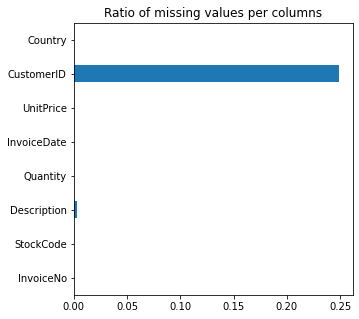

In [55]:
plt.figure(figsize=(5, 5))
raw_data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")

In [56]:
# check duplicates
raw_data.duplicated().sum()

5268

In [57]:
# drop duplicates
raw_data = raw_data.drop_duplicates(ignore_index = True)

In [58]:
# check duplicates
raw_data.duplicated().sum()

0

# **Exploratory Data Analysis (EDA)**

In [59]:
import plotly.express as px
df = px.data.tips()
fig = px.box(raw_data, y="UnitPrice")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [46]:
import plotly.express as px
df = px.data.tips()
fig = px.box(raw_data, y="Quantity")
fig.show()

In [62]:

df_new=raw_data.select_dtypes(include=['int','float'])

from scipy import stats

outliers={}
for col in df_new:
  lower_lim=df_new[col].quantile(q=0.01)
  upper_lim=df_new[col].quantile(q=0.99)

  outliers[col]=len(df_new[col][(df_new[col]>upper_lim)|(df_new[col]<lower_lim)])





In [65]:
  outliers_hardedge=pd.DataFrame(outliers.items(),columns=['feature','outliers'])

  outliers_hardedge

feature  outliers
0    Quantity      9980
1   UnitPrice      8413
2  CustomerID      7884